<a href="https://colab.research.google.com/github/dfu2020/ATMS-597-SP-2020-Project-4/blob/master/Project_4_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [0]:
#imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import pandas as pd
import datetime
import os
import glob

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#change to your directory where you stored the files
%cd /content/drive/My Drive/Project_4/

/content/drive/My Drive/Project_4


##Download and untar files

In [0]:
!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/daily.tar.gz
!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/prof.tar.gz
!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/sfc.tar.gz
!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/KCMI_daily.csv
!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/KCMI_hourly.csv

--2020-04-08 04:49:00--  https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/daily.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138321 (135K) [application/octet-stream]
Saving to: ‘daily.tar.gz.1’

daily.tar.gz.1      100%[===================>] 135.08K  --.-KB/s    in 0.03s   

2020-04-08 04:49:00 (3.78 MB/s) - ‘daily.tar.gz.1’ saved [138321/138321]

--2020-04-08 04:49:01--  https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/prof.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request se

In [0]:
#untar the sfc .gz file
!tar xvzf sfc.tar.gz
!mv bufkit surface3
#untar the prof .gz file
!tar xvzf prof.tar.gz
!mv bufkit profile3
#untar the daily .gz file
!tar xvzf daily.tar.gz
!mv bufkit daily3

Streaming output truncated to the last 5000 lines.
bufkit/2016050112.gfs_kcmi.buf_prof.csv
bufkit/2016050212.gfs_kcmi.buf_prof.csv
bufkit/2016050312.gfs_kcmi.buf_prof.csv
bufkit/2016050412.gfs_kcmi.buf_prof.csv
bufkit/2016050512.gfs_kcmi.buf_prof.csv
bufkit/2016050612.gfs_kcmi.buf_prof.csv
bufkit/2016050712.gfs_kcmi.buf_prof.csv
bufkit/2016050812.gfs_kcmi.buf_prof.csv
bufkit/2016050912.gfs_kcmi.buf_prof.csv
bufkit/2016051012.gfs_kcmi.buf_prof.csv
bufkit/2016051112.gfs_kcmi.buf_prof.csv
bufkit/2016051212.gfs_kcmi.buf_prof.csv
bufkit/2016051312.gfs_kcmi.buf_prof.csv
bufkit/2016051412.gfs_kcmi.buf_prof.csv
bufkit/2016051512.gfs_kcmi.buf_prof.csv
bufkit/2016051612.gfs_kcmi.buf_prof.csv
bufkit/2016051712.gfs_kcmi.buf_prof.csv
bufkit/2016051812.gfs_kcmi.buf_prof.csv
bufkit/2016051912.gfs_kcmi.buf_prof.csv
bufkit/2016052012.gfs_kcmi.buf_prof.csv
bufkit/2016052112.gfs_kcmi.buf_prof.csv
bufkit/2016052212.gfs_kcmi.buf_prof.csv
bufkit/2016052312.gfs_kcmi.buf_prof.csv
bufkit/2016052412.gfs_kcmi.bu

## Read GFS daily file

In [0]:
#to merge the daily tar files
path = "daily/"
all_files = glob.glob(path + "*.csv")
all_files.sort()    #sort the files by time

list = [] 
for i in np.arange(0,len(all_files)):
  GFS_daily_file = pd.read_csv(all_files[i], header=0)
  list.append(GFS_daily_file)
GFS_daily = pd.concat(list, axis=0)
GFS_daily_new = GFS_daily.set_axis(['Time','TMAX','TMIN','WMAX','RTOT'], #rename
                                   axis=1,inplace=False)                 # axis
GFS_daily_new.set_index('Time',inplace=True) #replace the index name as Time
GFS_daily_new.to_csv('GFS_daily_new.csv')  #save as new csv file 
GFS_daily_new

## Read GFS surface file

In [0]:
path = "surface/"
all_files = glob.glob(path + "*.csv")
all_files.sort()

GFS_array = []
for i in np.arange(0,len(all_files)):

  GFS_file_df = pd.read_csv(all_files[i], header=0)
  GFS_file_df = GFS_file_df.T
  GFS_array.append(GFS_file_df.iloc[1:9, :]) 
GFS_Sfc = pd.concat(GFS_array, axis=0)
GFS_Sfc.set_axis(['DWPC','HCLD','LCLD','MCLD','PRCP','PRES','TMPC','UWND',
                  'VWND','WSPD'], axis=1,inplace=True)
GFS_Sfc.rename_axis("Time",inplace=True)
GFS_Sfc.to_csv('GFS_Sfc_new.csv')

In [0]:
GFS_Sfc_new = pd.read_csv('GFS_Sfc_new.csv', index_col='Time',parse_dates=True, infer_datetime_format=True)
GFS_Sfc_new.replace({9999.0: np.nan}, inplace=True)
GFS_Sfc_new.replace({-9999.0: np.nan}, inplace=True)

GFS_Sfc_hourly_mean =GFS_Sfc_new.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).mean() #
GFS_Sfc_hourly_max =GFS_Sfc_new.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).max() #
GFS_Sfc_hourly_min =GFS_Sfc_new.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).min() #
GFS_Sfc_hourly_sum =GFS_Sfc_new.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).sum() #

GFS_Sfc_hourly_1 = pd.merge(GFS_Sfc_hourly_max, GFS_Sfc_hourly_min, on='Time', how='inner', suffixes=('_max', '_min'))
GFS_Sfc_hourly_2 = pd.merge(GFS_Sfc_hourly_mean, GFS_Sfc_hourly_sum, on='Time', how='inner', suffixes=('_mean', '_total'))

GFS_Sfc_hourly_final = []
GFS_Sfc_hourly_final = pd.merge(GFS_Sfc_hourly_1, GFS_Sfc_hourly_2, on='Time', how='inner')
GFS_Sfc_hourly_final = GFS_Sfc_hourly_final[(GFS_Sfc_hourly_final.index>='2010') & (GFS_Sfc_hourly_final.index<'2020')]
GFS_Sfc_hourly_final.to_csv('GFS_Sfc_final.csv')
GFS_Sfc_hourly_final

,DWPC_max,HCLD_max,LCLD_max,MCLD_max,PRCP_max,PRES_max,TMPC_max,UWND_max,VWND_max,WSPD_max,DWPC_min,HCLD_min,LCLD_min,MCLD_min,PRCP_min,PRES_min,TMPC_min,UWND_min,VWND_min,WSPD_min,DWPC_mean,HCLD_mean,LCLD_mean,MCLD_mean,PRCP_mean,PRES_mean,TMPC_mean,UWND_mean,VWND_mean,WSPD_mean,DWPC_total,HCLD_total,LCLD_total,MCLD_total,PRCP_total,PRES_total,TMPC_total,UWND_total,VWND_total,WSPD_total
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02,-13.74,0.0,100.0,1.0,0.04,1002.0,-11.26,4.9,-4.0,7.323933,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517,-17.67750,0.000000,39.750000,0.125,0.00625,1000.7125,-14.1225,3.7625,-4.8875,6.221484,-141.42,0.0,318.0,1.0,0.05,8005.7,-112.98,30.1,-39.1,49.771872
2010-01-03,-14.21,42.0,7.0,1.0,0.00,1001.8,-10.16,3.6,-2.5,4.687217,-18.81,0.0,0.0,0.0,0.0,999.9,-15.96,1.5,-3.9,3.330165,-16.95625,8.428571,3.500000,0.250,0.00000,1000.8625,-13.6850,2.3000,-3.2500,4.027716,-135.65,59.0,28.0,2.0,0.00,8006.9,-109.48,18.4,-26.0,32.221726
2010-01-04,-12.63,95.0,99.0,91.0,0.03,999.8,-9.96,4.4,-3.5,5.941380,-16.27,0.0,5.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407,-14.58750,33.125000,29.875000,34.000,0.00375,998.3125,-12.3975,3.8625,-3.8750,5.479951,-116.70,265.0,239.0,272.0,0.03,7986.5,-99.18,30.9,-31.0,43.839612
2010-01-05,-10.75,94.0,100.0,67.0,0.03,997.3,-8.46,4.6,-2.7,5.685068,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058,-12.83500,30.125000,99.125000,18.375,0.02125,996.4500,-10.9225,4.0000,-3.2625,5.180510,-102.68,241.0,793.0,147.0,0.17,7971.6,-87.38,32.0,-26.1,41.444079
2010-01-06,-9.45,90.0,100.0,100.0,0.05,996.0,-7.16,3.6,0.1,3.794733,-12.56,0.0,1.0,0.0,0.0,992.5,-11.06,0.1,-2.0,0.141421,-11.17000,28.750000,73.857143,30.000,0.01375,994.5625,-9.5100,2.1875,-0.9125,2.427097,-89.36,230.0,517.0,240.0,0.11,7956.5,-76.08,17.5,-7.3,19.416778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,10.79,100.0,93.0,15.0,0.00,996.5,11.84,2.8,0.3,3.687818,0.22,0.0,0.0,0.0,0.0,991.2,4.54,-2.7,-2.4,0.921954,2.22375,66.500000,28.500000,2.000,0.00000,994.6250,7.0150,0.7000,-1.0000,2.216546,17.79,532.0,228.0,16.0,0.00,7957.0,56.12,5.6,-8.0,17.732367
2019-12-28,11.61,100.0,95.0,70.0,0.53,996.0,13.84,-2.3,6.6,7.823043,0.94,3.0,0.0,2.0,0.0,983.5,3.64,-4.2,-0.2,2.308679,6.93500,86.625000,49.875000,24.125,0.14875,990.3625,8.9400,-3.2250,3.4125,5.016599,55.48,693.0,399.0,193.0,1.19,7922.9,71.52,-25.8,27.3,40.132794
2019-12-29,14.23,100.0,100.0,100.0,9.70,979.1,15.64,3.0,8.7,8.796590,8.28,33.0,0.0,80.0,0.0,972.3,10.44,-3.7,3.9,4.080441,11.45375,90.375000,40.625000,93.750,1.35000,975.7625,14.0650,0.4625,5.5750,5.975564,91.63,723.0,325.0,750.0,10.80,7806.1,112.52,3.7,44.6,47.804516


##Read GFS profile file

In [0]:
#to merge the gfs profile files
path = "profile/"
all_files = glob.glob(path + "*.csv")
all_files.sort()

list = []
for i in np.arange(0,len(all_files)):
  GFS_prof_file = pd.read_csv(all_files[i], header=0)
  list.append(GFS_prof_file.iloc[1:9, :])
GFS_prof = pd.concat(list, axis=0)
GFS_prof.set_axis(['Time','DWPC','HGHT','PRES','TMPC','UWND','VWND'],
                                   axis=1,inplace=True)
GFS_prof.set_index('Time',inplace=True)
GFS_prof.to_csv('GFS_profile_new.csv')

In [0]:
GFS_profile = pd.read_csv('GFS_profile_new.csv', index_col='Time', parse_dates=True, infer_datetime_format=True)
def extract_var_GFS_profile(var, level):
    list = []
    levels = [925, 850, 700, 500, 250, 100]
    x = levels.index(level)
    h = GFS_profile[var].str.strip('[|]|,').values
    for i in range(0,len(GFS_profile)):
        e = h[i].split(',')[x]
        list.append(e)
    new_col_name = var + '_' + str(level)
    GFS_profile[new_col_name]=list

GFS_profile_names = ['DWPC', 'HGHT', 'TMPC', 'UWND', 'VWND']
levels = [925, 850, 700, 500]
for i in GFS_profile_names:
    for j in levels:        
        extract_var_GFS_profile(i,j)
GFS_profile = GFS_profile.drop(GFS_profile_names, axis=1)
GFS_profile = GFS_profile.drop('PRES', axis=1)
GFS_profile.dropna(inplace=True)
GFS_profile = GFS_profile.astype(float)

GFS_Sfc_hourly_sum =GFS_Sfc_new.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).sum() #
GFS_profile_max = GFS_profile.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).max()
GFS_profile_min = GFS_profile.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).min()
GFS_profile_mean = GFS_profile.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).mean()
GFS_profile_sum = GFS_profile.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).sum()


GFS_profile_1 = pd.merge(GFS_profile_max, GFS_profile_min, on='Time', how='inner', suffixes=('_max', '_min'))
GFS_profile_2 = pd.merge(GFS_profile_mean, GFS_profile_sum, on='Time', how='inner', suffixes=('_mean', '_total'))

GFS_profile_final = pd.merge(GFS_profile_1, GFS_profile_2, on='Time', how='inner')
GFS_profile_final = GFS_profile_final[(GFS_profile_final.index>='2010') & (GFS_profile_final.index<'2020')]
GFS_profile_final.to_csv('GFS_profile_final_new.csv')
GFS_profile_final

## Read KCMI hourly files and resample daily precip





In [0]:
#read in the KCMI hourly data.
KCMI_hourly = pd.read_csv('KCMI_hourly.csv',index_col='Timestamp',parse_dates=True, infer_datetime_format=True)  
KCMI_hourly = KCMI_hourly.rename_axis('Time') #rename timestamp to 'Time' to be consistent
KCMI_hourly.index = KCMI_hourly.index - pd.DateOffset(hours=6)  #convert timestamp back to KCMI local time
KCMI_hourly_prec = KCMI_hourly[['pr1h']] #read in the hourly precip

In [0]:
KCMI_hourly_prec = KCMI_hourly_prec.replace(-0.1, np.nan)   #replace the -0.1 with np.nan
KCMI_daily_prec = KCMI_hourly_prec.resample(rule='24H',closed='left',label='left',base=0).sum() #sum each day total precip
KCMI_daily_prec.columns=['precip_(mm)']  #rename column
KCMI_daily_prec_final = KCMI_daily_prec[(KCMI_daily_prec.index>='2010') & (KCMI_daily_prec.index<'2020')] #choose 2010-2019
KCMI_daily_prec_final

,precip_(mm)
Time,
2010-01-01,0.0
2010-01-02,0.0
2010-01-03,0.0
2010-01-04,0.0
2010-01-05,0.0
...,...
2019-12-27,0.0
2019-12-28,2.8
2019-12-29,4.3


In [0]:
KCMI_hourly = KCMI_hourly[(KCMI_hourly.index.hour >= 0) & (KCMI_hourly.index.hour <= 18)]
KCMI_hourly['pr1h']= KCMI_hourly['pr1h'].replace(-0.1, 0) 
KCMI_d_hourly_mean = KCMI_hourly.resample(rule='24H',closed='left',label='left',base=0).mean()
KCMI_d_hourly_max = KCMI_hourly.resample(rule='24H',closed='left',label='left',base=0).max()
KCMI_d_hourly_min = KCMI_hourly.resample(rule='24H',closed='left',label='left',base=0).min()
KCMI_d_hourly_sum = KCMI_hourly.resample(rule='24H',closed='left',label='left',base=0).sum()

KCMI_d_hourly_mean.index = KCMI_d_hourly_mean.index + pd.DateOffset(days = 1)
KCMI_d_hourly_max.index = KCMI_d_hourly_max.index + pd.DateOffset(days = 1)
KCMI_d_hourly_min.index = KCMI_d_hourly_min.index + pd.DateOffset(days = 1)
KCMI_d_hourly_sum.index = KCMI_d_hourly_sum.index + pd.DateOffset(days = 1)

KCMI_d_hourly_1 = pd.merge(KCMI_d_hourly_max.iloc[:,0:7], KCMI_d_hourly_min.iloc[:,0:7], on='Time', how='inner', suffixes=('_max', '_min'))
KCMI_d_hourly_2 = pd.merge(KCMI_d_hourly_mean.iloc[:,0:7], KCMI_d_hourly_sum.iloc[:,0:7], on='Time', how='inner', suffixes=('_mean', '_total'))

KCMI_d_hourly_final = []
KCMI_d_hourly_final = pd.merge(KCMI_d_hourly_1, KCMI_d_hourly_2, on='Time', how='inner')
KCMI_d_hourly_final = KCMI_d_hourly_final[(KCMI_d_hourly_final.index>='2010') & (KCMI_d_hourly_final.index<'2020')]
KCMI_d_hourly_final.to_csv('KCMI_d_hourly_final.csv')
KCMI_d_hourly_final

,tmpc_max,dwpc_max,mslp_max,wdir_max,wspd_max,skct_max,pr1h_max,tmpc_min,dwpc_min,mslp_min,wdir_min,wspd_min,skct_min,pr1h_min,tmpc_mean,dwpc_mean,mslp_mean,wdir_mean,wspd_mean,skct_mean,pr1h_mean,tmpc_total,dwpc_total,mslp_total,wdir_total,wspd_total,skct_total,pr1h_total
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.6,-0.6,1022.3,300.0,9.3,9.0,0.3,-7.8,-12.2,1014.1,200.0,2.6,0.0,0.0,-1.316667,-2.988889,1016.883333,260.000000,5.211111,6.666667,0.033333,-23.7,-53.8,18303.9,4680.0,93.8,120.0,0.6
2010-01-02,-11.0,-15.6,1030.2,300.0,6.7,8.0,0.0,-16.1,-18.9,1026.1,280.0,3.6,0.0,0.0,-13.621053,-16.984211,1028.657895,286.315789,5.284211,1.842105,0.000000,-258.8,-322.7,19544.5,5440.0,100.4,35.0,0.0
2010-01-03,-14.4,-17.8,1034.4,320.0,6.7,0.0,0.0,-19.4,-21.7,1031.1,270.0,3.1,0.0,0.0,-16.789474,-19.884211,1032.536842,296.842105,4.821053,0.000000,0.000000,-319.0,-377.8,19618.2,5640.0,91.6,0.0,0.0
2010-01-04,-12.2,-17.2,1033.0,350.0,5.1,0.0,0.0,-21.1,-23.9,1031.3,270.0,1.5,0.0,0.0,-16.673684,-20.847368,1032.173684,312.105263,3.463158,0.000000,0.000000,-316.8,-396.1,19611.3,5930.0,65.8,0.0,0.0
2010-01-05,-11.7,-15.6,1030.2,310.0,8.2,8.0,0.0,-18.9,-21.7,1026.9,280.0,3.6,0.0,0.0,-15.321053,-18.468421,1028.557895,293.684211,5.731579,1.263158,0.000000,-291.1,-350.9,19542.6,5580.0,108.9,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,16.7,12.2,1017.3,220.0,8.2,4.0,0.0,8.3,7.8,1013.2,180.0,3.1,0.0,0.0,12.063158,10.336842,1015.821053,197.368421,5.357895,0.666667,0.000000,229.2,196.4,19300.6,3750.0,101.8,12.0,0.0
2019-12-28,7.8,6.7,1026.7,350.0,6.7,2.0,0.0,0.0,-0.6,1019.7,0.0,0.0,0.0,0.0,3.415789,1.742105,1024.136842,250.526316,3.536842,0.500000,0.000000,64.9,33.1,19458.6,4760.0,67.2,2.0,0.0
2019-12-29,11.7,11.1,1023.9,120.0,8.2,9.0,0.0,0.0,-0.6,1013.5,60.0,3.1,0.0,0.0,5.247368,4.947368,1019.566667,98.947368,5.473684,6.166667,0.000000,99.7,94.0,18352.2,1880.0,104.0,74.0,0.0


## Read KCMI Daily and Replacing Precip

In [0]:
#read KCMI daily observations
KCMI_daily = pd.read_csv('KCMI_daily.csv', skiprows=8, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
KCMI_daily_new = KCMI_daily.iloc[:-7,:]
KCMI_daily_new =KCMI_daily_new.drop(['Unnamed: 5'],axis=1)  
KCMI_daily_new = KCMI_daily_new.rename_axis('Time')
KCMI_daily_new=KCMI_daily_new.set_axis(['T_MAX(F)','T_MIN(F)','W_MAX(mph)','R_TOT(in)'],axis=1)
KCMI_daily_new = KCMI_daily_new.drop('R_TOT(in)',axis=1)
KCMI_daily_new['precip_(mm)'] = KCMI_daily_prec_final['precip_(mm)'].values


In [0]:
#now converting the units

#removing the Missing values
KCMI_daily_new=KCMI_daily_new.iloc[:,:].replace('M', np.nan)

# Convert TMAX,TMIN to Celcius, W_MAX to m/s
KCMI_daily_new['T_MAX(C)'] = (KCMI_daily_new['T_MAX(F)'].astype(float) - 32) * 5/9
KCMI_daily_new['T_MIN(C)'] = (KCMI_daily_new['T_MIN(F)'].astype(float)- 32) * 5/9
KCMI_daily_new['W_MAX(m/s)'] = KCMI_daily_new['W_MAX(mph)'].astype(float) * 0.44704
KCMI_daily_new['R_TOT(mm)'] = KCMI_daily_new['precip_(mm)']

KCMI_daily_final=KCMI_daily_new.iloc[:,4:]  #slice to include only converted columns
#save the final daily KCMI observation csv
KCMI_daily_final.to_csv('KCMI_daily_format.csv')

## Combine features

In [0]:
KCMI_daily_final = pd.read_csv('KCMI_daily_format.csv', index_col = 'Time', parse_dates = True, infer_datetime_format=True)
KCMI_d_hourly_final = pd.read_csv('KCMI_d_hourly_final.csv', index_col = 'Time', parse_dates = True, infer_datetime_format=True)

In [0]:
GFS_daily = pd.read_csv('GFS_daily_new.csv', index_col='Time',parse_dates=True) #read in previously merged GFS daily file
  #drop the unnamed column
GFS_daily.index = GFS_daily.index + pd.DateOffset(hours=12) 
GFS_daily_new = GFS_daily[(GFS_daily.index >= '2010') & (GFS_daily.index < '2020')] #choose 2010-2019 data

In [0]:
GFS_Sfc_final=pd.read_csv('GFS_Sfc_final.csv', index_col = 'Time', parse_dates = True, infer_datetime_format=True)
GFS_profile_final= pd.read_csv('GFS_profile_final_new.csv', index_col = 'Time', parse_dates = True, infer_datetime_format=True)

In [7]:
predictor_matrix=[]
predictor_matrix = KCMI_daily_final.merge(KCMI_d_hourly_final, left_index=True, right_index=True)
predictor_matrix = predictor_matrix.merge(GFS_daily_new, left_index=True, right_index=True)
predictor_matrix = predictor_matrix.merge(GFS_Sfc_final, left_index=True, right_index=True)
predictor_matrix = predictor_matrix.merge(GFS_profile_final, left_index=True, right_index=True)
predictor_matrix['year']=predictor_matrix.index.year
predictor_matrix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3613 entries, 2010-01-02 to 2019-12-31
Columns: 157 entries, T_MAX(C) to year
dtypes: float64(156), int64(1)
memory usage: 4.4 MB


In [8]:
predictor_matrix=predictor_matrix.astype(float)
predictor_matrix = predictor_matrix.dropna()
predictor_matrix.to_csv('predictor_matrix.csv')
predictor_matrix

,T_MAX(C),T_MIN(C),W_MAX(m/s),R_TOT(mm),tmpc_max,dwpc_max,mslp_max,wdir_max,wspd_max,skct_max,pr1h_max,tmpc_min,dwpc_min,mslp_min,wdir_min,wspd_min,skct_min,pr1h_min,tmpc_mean,dwpc_mean,mslp_mean,wdir_mean,wspd_mean,skct_mean,pr1h_mean,tmpc_total,dwpc_total,mslp_total,wdir_total,wspd_total,skct_total,pr1h_total,TMAX,TMIN,WMAX,RTOT,DWPC_max,HCLD_max,LCLD_max,MCLD_max,...,DWPC_850_mean,DWPC_700_mean,DWPC_500_mean,HGHT_925_mean,HGHT_850_mean,HGHT_700_mean,HGHT_500_mean,TMPC_925_mean,TMPC_850_mean,TMPC_700_mean,TMPC_500_mean,UWND_925_mean,UWND_850_mean,UWND_700_mean,UWND_500_mean,VWND_925_mean,VWND_850_mean,VWND_700_mean,VWND_500_mean,DWPC_925_total,DWPC_850_total,DWPC_700_total,DWPC_500_total,HGHT_925_total,HGHT_850_total,HGHT_700_total,HGHT_500_total,TMPC_925_total,TMPC_850_total,TMPC_700_total,TMPC_500_total,UWND_925_total,UWND_850_total,UWND_700_total,UWND_500_total,VWND_925_total,VWND_850_total,VWND_700_total,VWND_500_total,year
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02,-14.444444,-20.555556,6.70560,0.0,-11.0,-15.6,1030.2,300.0,6.7,8.0,0.0,-16.1,-18.9,1026.1,280.0,3.6,0.0,0.0,-13.621053,-16.984211,1028.657895,286.315789,5.284211,1.842105,0.000000,-258.8,-322.7,19544.5,5440.0,100.4,35.0,0.0,-11.26,-16.46,7.323933,0.05,-13.74,0.0,100.0,1.0,...,-31.631814,-42.343174,-49.713078,820.874537,1458.322588,2924.016943,5404.973406,-17.736537,-15.005516,-16.276659,-26.871957,8.917408,11.668451,24.957946,49.957403,-18.631944,-22.035223,-36.006022,-53.129106,-176.551685,-221.422697,-296.402215,-347.991548,5746.121762,10208.258117,20468.118598,37834.813839,-124.155761,-105.038613,-113.936615,-188.103699,62.421856,81.679157,174.705622,349.701820,-130.423609,-154.246562,-252.042152,-371.903739,2010.0
2010-01-03,-12.222222,-21.111111,4.91744,0.0,-14.4,-17.8,1034.4,320.0,6.7,0.0,0.0,-19.4,-21.7,1031.1,270.0,3.1,0.0,0.0,-16.789474,-19.884211,1032.536842,296.842105,4.821053,0.000000,0.000000,-319.0,-377.8,19618.2,5640.0,91.6,0.0,0.0,-10.16,-15.96,4.687217,0.00,-14.21,42.0,7.0,1.0,...,-33.524255,-45.006084,-38.011418,825.026208,1466.561942,2943.248216,5429.166073,-14.528163,-13.728910,-14.633226,-28.177380,0.966968,2.928479,13.929298,34.531889,-8.503009,-12.642454,-22.324673,-29.460048,-196.899688,-268.194038,-315.042586,-304.091346,6600.209663,11732.495534,23545.985732,43433.328582,-116.225307,-109.831278,-117.065808,-225.419039,7.735744,23.427831,111.434383,276.255113,-68.024074,-101.139628,-178.597382,-235.680388,2010.0
2010-01-04,-11.666667,-18.888889,8.94080,0.0,-12.2,-17.2,1033.0,350.0,5.1,0.0,0.0,-21.1,-23.9,1031.3,270.0,1.5,0.0,0.0,-16.673684,-20.847368,1032.173684,312.105263,3.463158,0.000000,0.000000,-316.8,-396.1,19611.3,5930.0,65.8,0.0,0.0,-9.96,-14.36,5.941380,0.06,-12.63,95.0,99.0,91.0,...,-24.218344,-25.096941,-42.369095,808.518112,1455.589841,2932.208504,5390.650047,-13.448896,-11.433527,-16.459748,-31.019731,7.613226,6.086299,6.925063,7.042113,-18.257766,-18.436342,-22.440240,-22.675592,-158.185096,-193.746750,-200.775532,-338.952764,6468.144895,11644.718725,23457.668032,43125.200376,-107.591165,-91.468217,-131.677983,-248.157851,60.905806,48.690389,55.400501,56.336903,-146.062127,-147.490736,-179.521918,-181.404737,2010.0
2010-01-05,-12.222222,-18.333333,7.15264,0.0,-11.7,-15.6,1030.2,310.0,8.2,8.0,0.0,-18.9,-21.7,1026.9,280.0,3.6,0.0,0.0,-15.321053,-18.468421,1028.557895,293.684211,5.731579,1.263158,0.000000,-291.1,-350.9,19542.6,5580.0,108.9,24.0,0.0,-8.46,-12.86,5.685068,0.17,-10.75,94.0,100.0,67.0,...,-17.749616,-24.500529,-39.556158,796.682736,1446.840629,2934.372470,5413.979393,-12.478941,-9.982257,-14.372026,-29.423196,7.118404,5.853575,9.920349,12.764679,-15.989024,-18.744676,-22.421572,-19.083133,-122.033787,-141.996931,-196.004235,-316.449268,6373.461891,11574.725029,23474.979761,43311.835142,-99.831527,-79.858058,-114.976212,-235.385571,56.947235,46.828602,79.362788,102.117431,-127.912189,-149.957410,-179.372578,-152.665067,2010.0
2010-01-06,-7.777778,-19.444444,3.

##Multiple_Linear_Regression

In [0]:
#check the correlation between different features.
h=predictor_matrix.corr()[['R_TOT(mm)']].sort_values(by='R_TOT(mm)', ascending=False)

h=h.drop(index=['T_MAX(C)','T_MIN(C)','W_MAX(m/s)','R_TOT(mm)','year'])
#loop through all predictors
for i in range (1,len(h)):
  e=h.head(i).index.to_list()
  predictors = e
  #predictors = ['HCLD_total','PRCP_total']

  X_train = predictor_matrix[predictor_matrix['year']< 2019][predictors]
  X_test = predictor_matrix[predictor_matrix['year']== 2019][predictors]
  y_train = predictor_matrix[predictor_matrix['year']< 2019]['R_TOT(mm)']
  y_test = predictor_matrix[predictor_matrix['year']== 2019]['R_TOT(mm)']

  regressor = LinearRegression()

  # fit the build the model by fitting the regressor to the training data
  regressor.fit(X_train, y_train)

  # make a prediction set using the test set
  prediction = regressor.predict(X_test)

  # Evaluate the prediction accuracy of the model
  from sklearn.metrics import mean_absolute_error, median_absolute_error
  print(i)
  print("The Root Mean Square Error: %.2f mm " %  sqrt(mean_squared_error(y_test, prediction)))

1
The Root Mean Square Error: 3.97 mm 
2
The Root Mean Square Error: 3.95 mm 
3
The Root Mean Square Error: 3.95 mm 
4
The Root Mean Square Error: 3.96 mm 
5
The Root Mean Square Error: 3.93 mm 
6
The Root Mean Square Error: 3.93 mm 
7
The Root Mean Square Error: 3.96 mm 
8
The Root Mean Square Error: 3.96 mm 
9
The Root Mean Square Error: 3.96 mm 
10
The Root Mean Square Error: 3.96 mm 
11
The Root Mean Square Error: 3.93 mm 
12
The Root Mean Square Error: 3.94 mm 
13
The Root Mean Square Error: 3.94 mm 
14
The Root Mean Square Error: 3.93 mm 
15
The Root Mean Square Error: 3.94 mm 
16
The Root Mean Square Error: 3.93 mm 
17
The Root Mean Square Error: 3.93 mm 
18
The Root Mean Square Error: 3.92 mm 
19
The Root Mean Square Error: 3.93 mm 
20
The Root Mean Square Error: 3.93 mm 
21
The Root Mean Square Error: 3.92 mm 
22
The Root Mean Square Error: 3.92 mm 
23
The Root Mean Square Error: 3.92 mm 
24
The Root Mean Square Error: 3.92 mm 
25
The Root Mean Square Error: 3.92 mm 
26
The Ro

TMAX

The Explained Variance: 0.98
The Mean Absolute Error: 1.33 degrees celsius
The Median Absolute Error: 1.15 degrees celsius
The Root Mean Square Error: 1.70 degrees celsius 
Model slope:     0.4955525397163469
Model intercept: 446.12043406457394


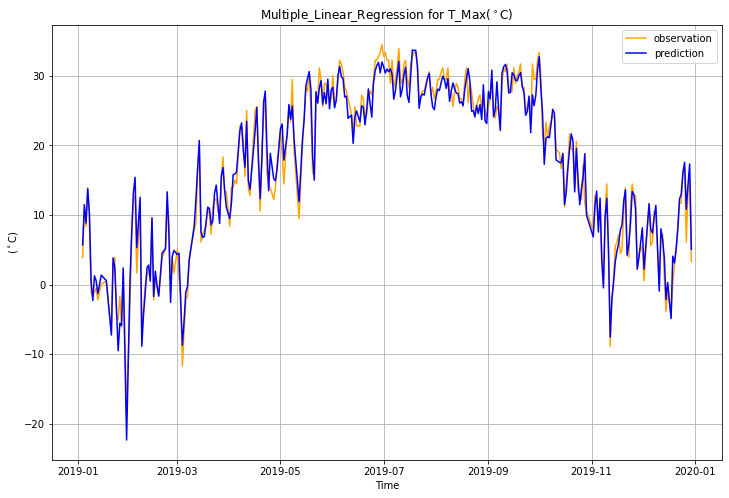

In [9]:
#check the correlation between different features.
h=predictor_matrix.corr()[['T_MAX(C)']].sort_values(by='T_MAX(C)', ascending=False)

h=h.drop(index=['T_MAX(C)','T_MIN(C)','W_MAX(m/s)','R_TOT(mm)','year'])
e=h.head(142).index.to_list()
predictors = e

X_train = predictor_matrix[predictor_matrix['year']< 2019][predictors]
X_test = predictor_matrix[predictor_matrix['year']== 2019][predictors]
y_train = predictor_matrix[predictor_matrix['year']< 2019]['T_MAX(C)']
y_test = predictor_matrix[predictor_matrix['year']== 2019]['T_MAX(C)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)


# Evaluate the prediction accuracy of the model

from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, prediction)))
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)
time = predictor_matrix.index[predictor_matrix.index.year==2019].values
plt.figure(figsize=(12, 8))
plt.plot(time,y_test,c='orange',label='observation')
plt.plot(time,prediction, c='blue',label='prediction')
plt.title('Multiple_Linear_Regression for T_Max($^\circ$C)')
plt.xlabel('Time')
plt.ylabel('($^\circ$C)')
plt.legend()
plt.grid(True)
plt.rcParams.update({'font.size': 16})
plt.show()

TMIN

The Explained Variance: 0.97
The Mean Absolute Error: 1.37 degrees celsius
The Median Absolute Error: 1.12 degrees celsius
The Root Mean Square Error: 1.73 degrees celsius 
Model slope:     0.6275507914859924
Model intercept: 1.923973430451011


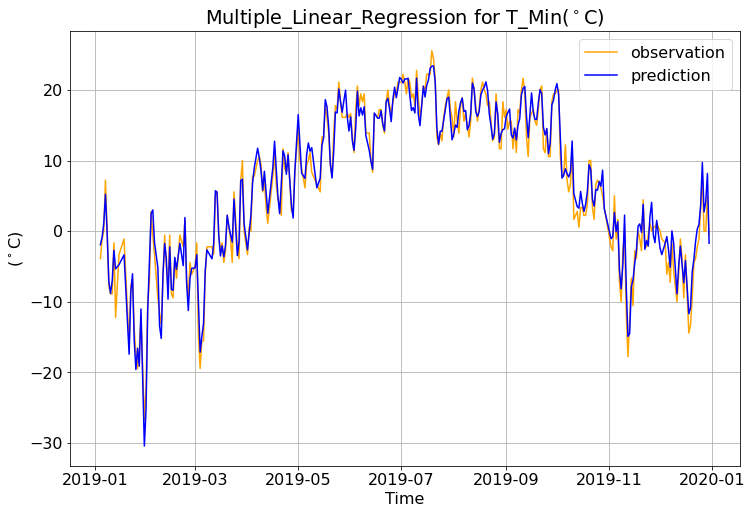

In [10]:
#check the correlation between different features.
h=predictor_matrix.corr()[['T_MIN(C)']].sort_values(by='T_MIN(C)', ascending=False)

h=h.drop(index=['T_MAX(C)','T_MIN(C)','W_MAX(m/s)','R_TOT(mm)','year'])
e=h.head(40).index.to_list()
predictors = e


X_train = predictor_matrix[predictor_matrix['year']< 2019][predictors]
X_test = predictor_matrix[predictor_matrix['year']== 2019][predictors]
y_train = predictor_matrix[predictor_matrix['year']< 2019]['T_MIN(C)']
y_test = predictor_matrix[predictor_matrix['year']== 2019]['T_MIN(C)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, prediction)))
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)
time = predictor_matrix.index[predictor_matrix.index.year==2019].values
plt.figure(figsize=(12, 8))
plt.plot(time,y_test,c='orange',label='observation')
plt.plot(time,prediction, c='blue',label='prediction')
plt.title('Multiple_Linear_Regression for T_Min($^\circ$C)')
plt.xlabel('Time')
plt.ylabel('($^\circ$C)')
plt.legend()
plt.grid(True)
plt.rcParams.update({'font.size': 16})
plt.show()

WMAX

The Explained Variance: 0.71
The Mean Absolute Error: 1.24 m/s
The Median Absolute Error: 1.07 m/s
The Root Mean Square Error: 1.59 m/s
Model slope:     0.17809953220907848
Model intercept: 1.4048330275015886


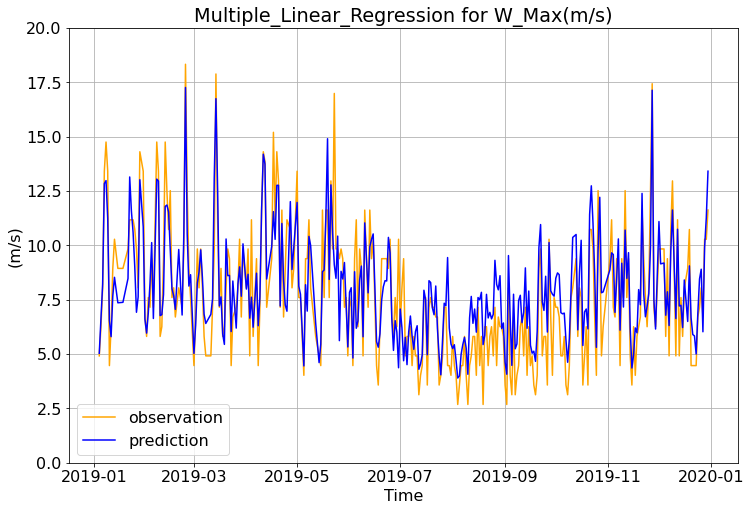

In [12]:
#check the correlation between different features.
h=predictor_matrix.corr()[['W_MAX(m/s)']].sort_values(by='W_MAX(m/s)', ascending=False)

h=h.drop(index=['T_MAX(C)','T_MIN(C)','W_MAX(m/s)','R_TOT(mm)','year'])
e=h.head(16).index.to_list()
predictors = e

#new_features = predictor_matrix[['W_MAX(m/s)']+ predictors + ['year']] 
X = predictor_matrix[predictors]
y = predictor_matrix['W_MAX(m/s)']

X_train = predictor_matrix[predictor_matrix['year']< 2019][predictors]
X_test = predictor_matrix[predictor_matrix['year']== 2019][predictors]
y_train = predictor_matrix[predictor_matrix['year']< 2019]['W_MAX(m/s)']
y_test = predictor_matrix[predictor_matrix['year']== 2019]['W_MAX(m/s)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f m/s" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f m/s" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f m/s" %  sqrt(mean_squared_error(y_test, prediction)))
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)
time = predictor_matrix.index[predictor_matrix.index.year==2019].values
plt.figure(figsize=(12, 8))
plt.plot(time,y_test,c='orange',label='observation')
plt.plot(time,prediction, c='blue',label='prediction')
plt.title('Multiple_Linear_Regression for W_Max(m/s)')
plt.xlabel('Time')
plt.ylabel('(m/s)')
plt.ylim(0,20)
plt.legend()
plt.grid(True)
plt.rcParams.update({'font.size': 16})
plt.show()

RTOT

The Explained Variance: 0.36
The Mean Absolute Error: 2.09 mm
The Median Absolute Error: 1.14 mm
The Root Mean Square Error: 3.87 mm 
Model slope:     0.735326361685985
Model intercept: 0.05285809910466854


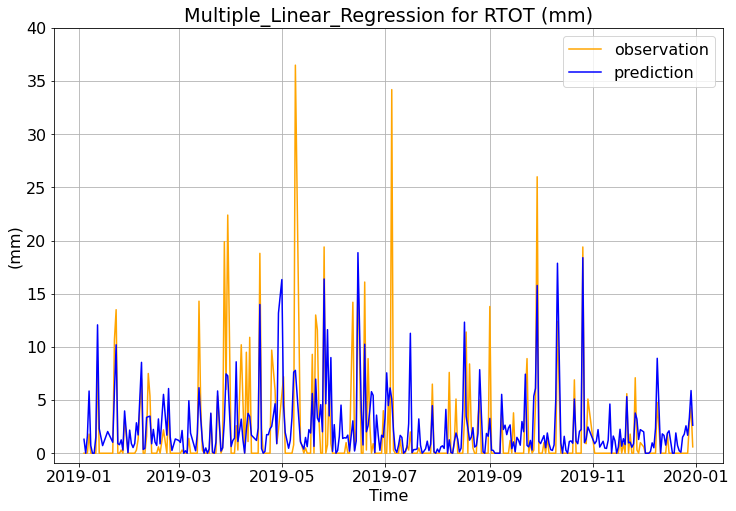

In [89]:
predictors = ['PRCP_total','PRCP_mean','PRCP_max','HCLD_mean','LCLD_mean','VWND_700_max']

X_train = predictor_matrix[predictor_matrix['year']< 2019][predictors]
X_test = predictor_matrix[predictor_matrix['year']== 2019][predictors]
y_train = predictor_matrix[predictor_matrix['year']< 2019]['R_TOT(mm)']
y_test = predictor_matrix[predictor_matrix['year']== 2019]['R_TOT(mm)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)
prediction[prediction<0]=0
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f mm" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f mm" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f mm " %  sqrt(mean_squared_error(y_test, prediction)))
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)
time = predictor_matrix.index[predictor_matrix.index.year==2019].values
plt.figure(figsize=(12, 8))
plt.plot(time,y_test,c='orange',label='observation')
plt.plot(time,prediction, c='blue',label='prediction')
plt.title('Multiple_Linear_Regression for RTOT (mm)')
plt.ylim(-0.9,40)
plt.xlabel('Time')
plt.ylabel('(mm)')
plt.legend()
plt.grid(True)
plt.rcParams.update({'font.size': 16})
plt.show()

##RANDOMFOREST

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


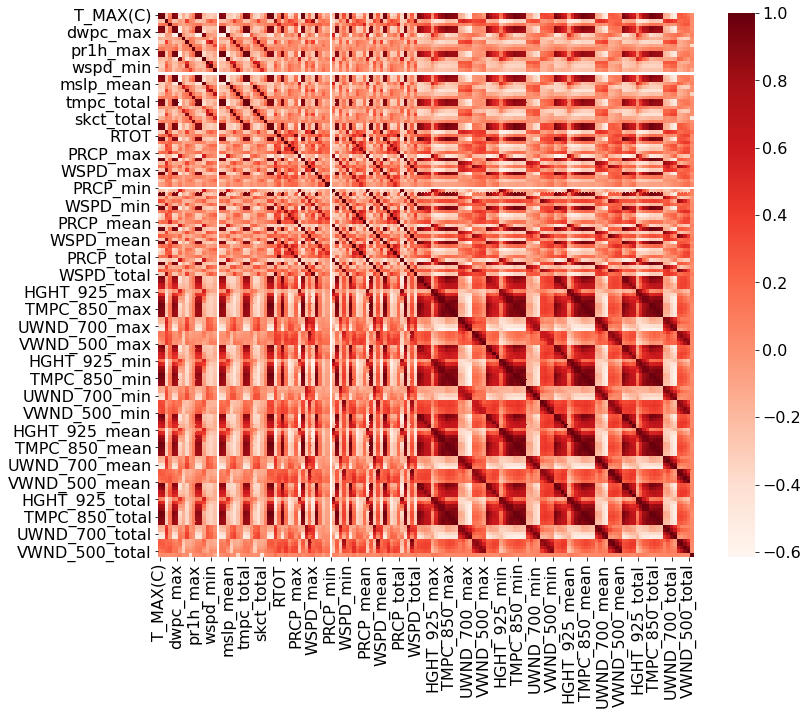

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = predictor_matrix.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

define functions for random forest

In [0]:
# n_estimators and max_features can be lists 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


def rf_model_func(variable, features, target,unit, n_estimators = 1000, max_features = 10):


    scaler = StandardScaler()
    X_train = predictor_matrix[predictor_matrix['year']< 2019][features]
    X_test = predictor_matrix[predictor_matrix['year']== 2019][features]
    y_train = predictor_matrix[predictor_matrix['year']< 2019][variable]
    y_test = predictor_matrix[predictor_matrix['year']== 2019][variable]

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    for n in n_estimators: 
        for m in max_features: 
            # Train the model 
            rf_model = RandomForestRegressor(n_estimators=n, max_features=m)
            rf_model.fit(X_train, y_train)

            # Print parameters and plot
            print("# of trees =", n)
            print("Max features = ", m)
            print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, rf_model.predict(X_test)) + unit)
            print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, rf_model.predict(X_test))+ unit)
            print("The Root Mean Square Error: %.2f " %  sqrt(mean_squared_error(y_test, rf_model.predict(X_test)))+ unit)
            print('Coefficient of determination: %.2f' % r2_score(y_test, rf_model.predict(X_test)))

    print(sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), features), reverse=True))
    return X_test, y_test, rf_model

def rf_model_plot(variable, unit,model_type = 'Random Forest'):
    time = predictor_matrix.index[predictor_matrix.index.year==2019].values
    plt.figure(figsize=(12,8))
    plt.plot(time, y_test, c='r', label='observation')
    plt.plot(time, rf_model.predict(X_test), c='g', label='prediction')
    plt.legend()
    plt.title(model_type + ': ' + variable)
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.grid(True)
    plt.show()

TMAX

# of trees = 1000
Max features =  3
The Mean Absolute Error: 1.42 degrees celsius
The Median Absolute Error: 1.05 degrees celsius
The Root Mean Square Error: 1.90 degrees celsius
Coefficient of determination: 0.97
[(0.3612, 'TMPC_max'), (0.2808, 'TMAX'), (0.1647, 'TMPC_925_min'), (0.114, 'TMIN'), (0.0498, 'TMPC_850_min'), (0.0179, 'tmpc_max'), (0.0061, 'DWPC_925_mean'), (0.0056, 'DWPC_925_max')]


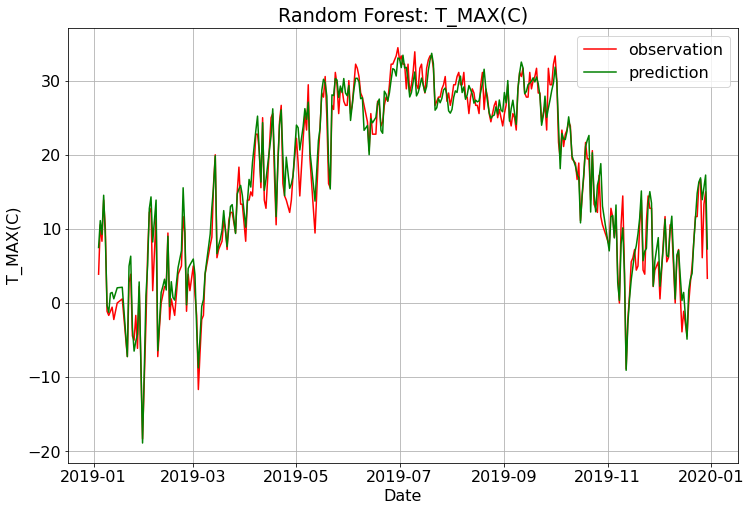

In [75]:
#cor_target = abs(cor['T_MAX(C)'])
variable='T_MAX(C)'
unit='degrees celsius'
#relevant_features = cor_target[cor_target>0.70]
features = ['TMAX', 'TMIN', 'TMPC_max', 'TMPC_925_min', 'TMPC_850_min', 'DWPC_925_max', 'DWPC_925_mean', 'tmpc_max']
target = ['T_MAX(C)']
#X_test, y_test, rf_model = rf_model_func(features, target, n_estimators = [1000], max_features = [1, 2, 3, 4, 5]) 
X_test, y_test, rf_model = rf_model_func(variable, features, target, unit, n_estimators = [1000], max_features = [ 3]) 
rf_model_plot(variable,unit)

TMIN

# of trees = 1000
Max features =  5
The Mean Absolute Error: 1.32 degrees celsius
The Median Absolute Error: 1.11 degrees celsius
The Root Mean Square Error: 1.72 degrees celsius
Coefficient of determination: 0.97
[(0.3418, 'TMIN'), (0.2926, 'TMPC_min'), (0.1403, 'TMPC_925_min'), (0.0626, 'DWPC_925_mean'), (0.0586, 'TMPC_max'), (0.04, 'TMAX'), (0.0276, 'DWPC_max'), (0.0135, 'DWPC_925_min'), (0.0121, 'TMPC_850_min'), (0.0032, 'TMPC_500_min'), (0.0028, 'tmpc_min'), (0.0026, 'tmpc_max'), (0.0023, 'TMPC_700_min')]


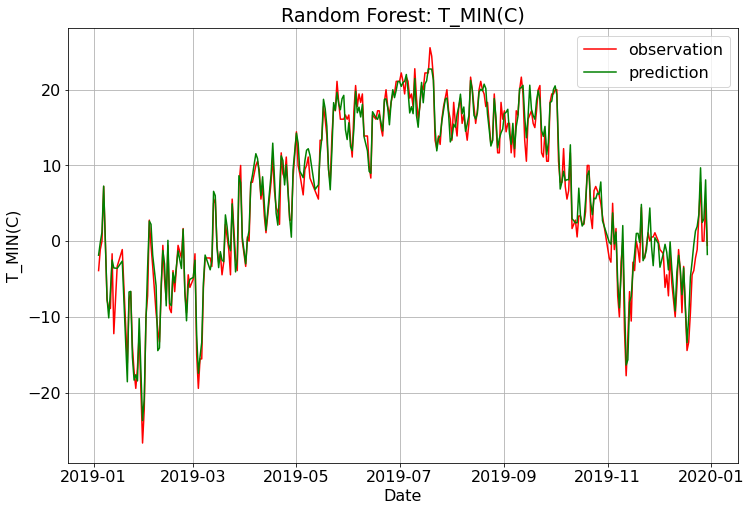

In [77]:
variable='T_MIN(C)'
unit='degrees celsius'
features = ['TMAX', 'TMIN', 'TMPC_min','DWPC_max','TMPC_max', 'TMPC_925_min','TMPC_500_min','TMPC_700_min', 'TMPC_850_min', 'DWPC_925_min','DWPC_925_mean', 'tmpc_min','tmpc_max']
target = ['T_MIN(C)']
#X_test, y_test, rf_model = rf_model_func(features, target, n_estimators = [1000], max_features = [1, 2, 3, 4, 5]) 
X_test, y_test, rf_model = rf_model_func(variable, features, target, unit, n_estimators = [1000], max_features = [5]) 
rf_model_plot(variable, unit)

WMAX

# of trees = 1000
Max features =  2
The Mean Absolute Error: 1.23 m/s
The Median Absolute Error: 1.02 m/s
The Root Mean Square Error: 1.57 m/s
Coefficient of determination: 0.72
[(0.2427, 'WSPD_max'), (0.2169, 'WSPD_mean'), (0.215, 'WMAX'), (0.1015, 'UWND_850_mean'), (0.0719, 'UWND_max'), (0.0606, 'HGHT_850_min'), (0.0485, 'HGHT_500_min'), (0.043, 'HGHT_700_max')]


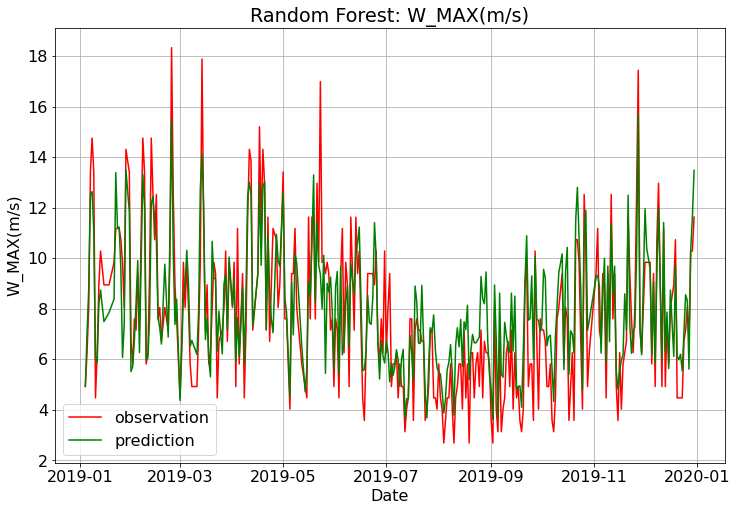

In [110]:
variable='W_MAX(m/s)'
unit='m/s'
features = ['WMAX', 'UWND_max', 'WSPD_max', 'WSPD_mean', 'HGHT_850_min', 'HGHT_500_min', 'HGHT_700_max', 'UWND_850_mean']
target = [variable]

X_test, y_test, rf_model = rf_model_func(variable,features, target,unit, n_estimators = [1000], max_features = [2])
rf_model_plot(variable, unit)

RTOT

# of trees = 1000
Max features =  1
The Mean Absolute Error: 1.93 mm
The Median Absolute Error: 0.48 mm
The Root Mean Square Error: 3.78 mm
Coefficient of determination: 0.39
[(0.2523, 'PRCP_mean'), (0.2382, 'PRCP_max'), (0.174, 'DWPC_700_max'), (0.1695, 'DWPC_500_min'), (0.166, 'VWND_500_max')]


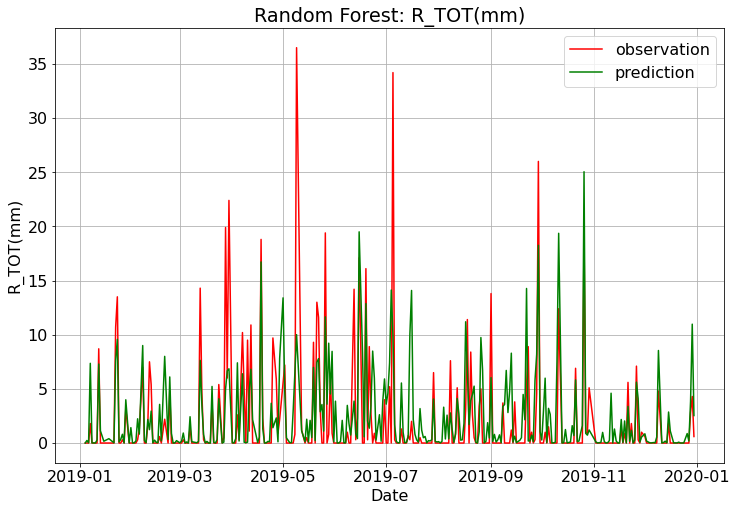

In [125]:
variable='R_TOT(mm)'
unit='mm'

features = ['PRCP_max', 'PRCP_mean','DWPC_700_max', 'DWPC_500_min', 'VWND_500_max']
target = [variable]

X_test, y_test, rf_model = rf_model_func(variable,features, target,unit, n_estimators = [1000], max_features = [1])
rf_model_plot(variable, unit)
